In [1]:
from pyspark import SparkContext
from pyspark.sql import SQLContext, Row
import pandas as pd

- 현업에서 spark dataframe을 제일 많이 사용한다. 

In [2]:
sc = SparkContext('local')
sqlCtx = SQLContext(sc)

In [3]:
df = sqlCtx.read.csv( 'data/crime_in_seoul.csv',encoding='euc-kr',
                    header=True, inferSchema=True) # infer schema를 쓰지 않으면 전부 strtfh dlstlrgksek. 

df

DataFrame[관서명: string, 살인 발생: int, 살인 검거: int, 강도 발생: int, 강도 검거: int, 강간 발생: int, 강간 검거: int, 절도 발생: string, 절도 검거: string, 폭력 발생: string, 폭력 검거: string]

In [4]:
df.show()
## pd에서 thousand 패러미터가 없기 때문에, 형처리 해야한다.
## 기반이 java기에 python보다는 사용이 까다롭다. 

+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|  관서명|살인 발생|살인 검거|강도 발생|강도 검거|강간 발생|강간 검거|절도 발생|절도 검거|폭력 발생|폭력 검거|
+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|  중부서|        2|        2|        3|        2|      105|       65|    1,395|      477|    1,355|    1,170|
|  종로서|        3|        3|        6|        5|      115|       98|    1,070|      413|    1,278|    1,070|
|남대문서|        1|        0|        6|        4|       65|       46|    1,153|      382|      869|      794|
|서대문서|        2|        2|        5|        4|      154|      124|    1,812|      738|    2,056|    1,711|
|  혜화서|        3|        2|        5|        4|       96|       63|    1,114|      424|    1,015|      861|
|  용산서|        5|        5|       14|       14|      194|      173|    1,557|      587|    2,050|    1,704|
|  성북서|        2|        2|        2|        1|       86|       

In [5]:
df.printSchema()

root
 |-- 관서명: string (nullable = true)
 |-- 살인 발생: integer (nullable = true)
 |-- 살인 검거: integer (nullable = true)
 |-- 강도 발생: integer (nullable = true)
 |-- 강도 검거: integer (nullable = true)
 |-- 강간 발생: integer (nullable = true)
 |-- 강간 검거: integer (nullable = true)
 |-- 절도 발생: string (nullable = true)
 |-- 절도 검거: string (nullable = true)
 |-- 폭력 발생: string (nullable = true)
 |-- 폭력 검거: string (nullable = true)



In [6]:
type(df)

pyspark.sql.dataframe.DataFrame

In [7]:
df.head(5) ## list의 row 객체로 받아온다.

[Row(관서명='중부서', 살인 발생=2, 살인 검거=2, 강도 발생=3, 강도 검거=2, 강간 발생=105, 강간 검거=65, 절도 발생='1,395', 절도 검거='477', 폭력 발생='1,355', 폭력 검거='1,170'),
 Row(관서명='종로서', 살인 발생=3, 살인 검거=3, 강도 발생=6, 강도 검거=5, 강간 발생=115, 강간 검거=98, 절도 발생='1,070', 절도 검거='413', 폭력 발생='1,278', 폭력 검거='1,070'),
 Row(관서명='남대문서', 살인 발생=1, 살인 검거=0, 강도 발생=6, 강도 검거=4, 강간 발생=65, 강간 검거=46, 절도 발생='1,153', 절도 검거='382', 폭력 발생='869', 폭력 검거='794'),
 Row(관서명='서대문서', 살인 발생=2, 살인 검거=2, 강도 발생=5, 강도 검거=4, 강간 발생=154, 강간 검거=124, 절도 발생='1,812', 절도 검거='738', 폭력 발생='2,056', 폭력 검거='1,711'),
 Row(관서명='혜화서', 살인 발생=3, 살인 검거=2, 강도 발생=5, 강도 검거=4, 강간 발생=96, 강간 검거=63, 절도 발생='1,114', 절도 검거='424', 폭력 발생='1,015', 폭력 검거='861')]

# count

In [8]:
## spark에서는 shape를 쓰면 안된다. 행을 알려면 df.count를 쓰자.
df.count(), print("행", df.count(), "열", len(df.columns)) ## row의 갯수르 보여준다. 


행 31 열 11


(31, None)

In [9]:
df.columns

['관서명',
 '살인 발생',
 '살인 검거',
 '강도 발생',
 '강도 검거',
 '강간 발생',
 '강간 검거',
 '절도 발생',
 '절도 검거',
 '폭력 발생',
 '폭력 검거']

# describe

In [10]:
df.describe()
# spark df를 만환한다.

DataFrame[summary: string, 관서명: string, 살인 발생: string, 살인 검거: string, 강도 발생: string, 강도 검거: string, 강간 발생: string, 강간 검거: string, 절도 발생: string, 절도 검거: string, 폭력 발생: string, 폭력 검거: string]

# to pandas

In [11]:
df.describe().toPandas# to pandas를 받을 수 있다.

<bound method PandasConversionMixin.toPandas of DataFrame[summary: string, 관서명: string, 살인 발생: string, 살인 검거: string, 강도 발생: string, 강도 검거: string, 강간 발생: string, 강간 검거: string, 절도 발생: string, 절도 검거: string, 폭력 발생: string, 폭력 검거: string]>

# select

In [12]:
df.select('관서명', '강도 발생') ## *는 cols, select 되어 나온 것도 spark df를 반환한다.

DataFrame[관서명: string, 강도 발생: int]

In [13]:
df.select('관서명', '강도 발생').show() ## 참고: spark에서는 index를 사용하지 않는다.
## selct를 통해서 필요한 column을 뽑을 수 있다.

+--------+---------+
|  관서명|강도 발생|
+--------+---------+
|  중부서|        3|
|  종로서|        6|
|남대문서|        6|
|서대문서|        5|
|  혜화서|        5|
|  용산서|       14|
|  성북서|        2|
|동대문서|       13|
|  마포서|       14|
|영등포서|       22|
|  성동서|        9|
|  동작서|        9|
|  광진서|       14|
|  서부서|        2|
|  강북서|       14|
|  금천서|        6|
|  중랑서|       11|
|  강남서|       15|
|  관악서|       12|
|  강서서|       13|
+--------+---------+
only showing top 20 rows



# orderby

In [14]:
df.orderBy('관서명').show(df.count())

+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|  관서명|살인 발생|살인 검거|강도 발생|강도 검거|강간 발생|강간 검거|절도 발생|절도 검거|폭력 발생|폭력 검거|
+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|  강남서|        3|        3|       15|       12|      300|      225|    2,411|      984|    2,465|    2,146|
|  강동서|        4|        3|        6|        8|      156|      123|    2,366|      789|    2,712|    2,248|
|  강북서|        7|        8|       14|       13|      153|      126|    1,434|      618|    2,649|    2,348|
|  강서서|        7|        8|       13|       13|      262|      191|    2,096|    1,260|    3,207|    2,718|
|  관악서|        9|        8|       12|       14|      320|      221|    2,706|      827|    3,298|    2,642|
|  광진서|        4|        4|       14|       26|      240|      220|    3,026|    1,277|    2,625|    2,180|
|  구로서|        8|        6|       15|       11|      281|     

In [15]:
# selct와 orderby를 동시에 사용하는 것도 가능하다. 
df2 = df.select('관서명', '강도 발생').orderBy('관서명')

df2.show()

+--------+---------+
|  관서명|강도 발생|
+--------+---------+
|  강남서|       15|
|  강동서|        6|
|  강북서|       14|
|  강서서|       13|
|  관악서|       12|
|  광진서|       14|
|  구로서|       15|
|  금천서|        6|
|남대문서|        6|
|  노원서|        7|
|  도봉서|        9|
|동대문서|       13|
|  동작서|        9|
|  마포서|       14|
|  방배서|        1|
|서대문서|        5|
|  서부서|        2|
|  서초서|        8|
|  성동서|        9|
|  성북서|        2|
+--------+---------+
only showing top 20 rows



# where

- where은 sql과 비슷하게 사용 할 수 있다.
- spark에서 한글이 잘 인식되지 않기에, '한글'과 같은 방식으로 표기해줘야 한다.

In [16]:

df.where("`관서명`= '강북서'").show()

+------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|관서명|살인 발생|살인 검거|강도 발생|강도 검거|강간 발생|강간 검거|절도 발생|절도 검거|폭력 발생|폭력 검거|
+------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|강북서|        7|        8|       14|       13|      153|      126|    1,434|      618|    2,649|    2,348|
+------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+



In [17]:
df.where("`살인 발생` > 5").show()

+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|  관서명|살인 발생|살인 검거|강도 발생|강도 검거|강간 발생|강간 검거|절도 발생|절도 검거|폭력 발생|폭력 검거|
+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|  마포서|        8|        8|       14|       10|      294|      247|    2,555|      813|    2,983|    2,519|
|영등포서|       14|       12|       22|       20|      295|      183|    2,964|      978|    3,572|    2,961|
|  강북서|        7|        8|       14|       13|      153|      126|    1,434|      618|    2,649|    2,348|
|  중랑서|       13|       12|       11|        9|      187|      148|    2,135|      829|    2,847|    2,407|
|  관악서|        9|        8|       12|       14|      320|      221|    2,706|      827|    3,298|    2,642|
|  강서서|        7|        8|       13|       13|      262|      191|    2,096|    1,260|    3,207|    2,718|
|  구로서|        8|        6|       15|       11|      281|      

In [18]:
df.where('`관서명` in("중부서", "종로서")').show()
# df[df['관서명'].isin(['중부서', '종로서'])]

+------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|관서명|살인 발생|살인 검거|강도 발생|강도 검거|강간 발생|강간 검거|절도 발생|절도 검거|폭력 발생|폭력 검거|
+------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|중부서|        2|        2|        3|        2|      105|       65|    1,395|      477|    1,355|    1,170|
|종로서|        3|        3|        6|        5|      115|       98|    1,070|      413|    1,278|    1,070|
+------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+



In [19]:
df.where('`살인 발생` between 5 and 10' ).show()
#df[df['살인 발생'].between(5,10)]

+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|  관서명|살인 발생|살인 검거|강도 발생|강도 검거|강간 발생|강간 검거|절도 발생|절도 검거|폭력 발생|폭력 검거|
+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|  용산서|        5|        5|       14|       14|      194|      173|    1,557|      587|    2,050|    1,704|
|동대문서|        5|        5|       13|       13|      173|      146|    1,981|      814|    2,548|    2,227|
|  마포서|        8|        8|       14|       10|      294|      247|    2,555|      813|    2,983|    2,519|
|  동작서|        5|        5|        9|        5|      285|      139|    1,865|      661|    1,910|    1,587|
|  강북서|        7|        8|       14|       13|      153|      126|    1,434|      618|    2,649|    2,348|
|  관악서|        9|        8|       12|       14|      320|      221|    2,706|      827|    3,298|    2,642|
|  강서서|        7|        8|       13|       13|      262|      

# where 연습 문제
- 살인발생이 10건 이상인 관서명, 살인발생, 살인 검거를 출력하시오.

In [20]:
df.where('`살인 발생` > 10').select('관서명', '살인 발생', '살인 검거').show()

+--------+---------+---------+
|  관서명|살인 발생|살인 검거|
+--------+---------+---------+
|영등포서|       14|       12|
|  중랑서|       13|       12|
|  송파서|       11|       10|
+--------+---------+---------+



# drop

In [21]:
df.drop('폭력 발생', '폭력 검거').show()

+--------+---------+---------+---------+---------+---------+---------+---------+---------+
|  관서명|살인 발생|살인 검거|강도 발생|강도 검거|강간 발생|강간 검거|절도 발생|절도 검거|
+--------+---------+---------+---------+---------+---------+---------+---------+---------+
|  중부서|        2|        2|        3|        2|      105|       65|    1,395|      477|
|  종로서|        3|        3|        6|        5|      115|       98|    1,070|      413|
|남대문서|        1|        0|        6|        4|       65|       46|    1,153|      382|
|서대문서|        2|        2|        5|        4|      154|      124|    1,812|      738|
|  혜화서|        3|        2|        5|        4|       96|       63|    1,114|      424|
|  용산서|        5|        5|       14|       14|      194|      173|    1,557|      587|
|  성북서|        2|        2|        2|        1|       86|       71|      953|      409|
|동대문서|        5|        5|       13|       13|      173|      146|    1,981|      814|
|  마포서|        8|        8|       14|       10|      294|    

# withcolumn
- pandas의 df['test'] = df['폭력발생']과 동일.

In [22]:
df.withColumn('test', df['폭력 발생']).show()

+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-----+
|  관서명|살인 발생|살인 검거|강도 발생|강도 검거|강간 발생|강간 검거|절도 발생|절도 검거|폭력 발생|폭력 검거| test|
+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+-----+
|  중부서|        2|        2|        3|        2|      105|       65|    1,395|      477|    1,355|    1,170|1,355|
|  종로서|        3|        3|        6|        5|      115|       98|    1,070|      413|    1,278|    1,070|1,278|
|남대문서|        1|        0|        6|        4|       65|       46|    1,153|      382|      869|      794|  869|
|서대문서|        2|        2|        5|        4|      154|      124|    1,812|      738|    2,056|    1,711|2,056|
|  혜화서|        3|        2|        5|        4|       96|       63|    1,114|      424|    1,015|      861|1,015|
|  용산서|        5|        5|       14|       14|      194|      173|    1,557|      587|    2,050|    1,704|2,050|
|  성북서|   

In [23]:
from pyspark.sql.functions import when, udf, col, regexp_replace
## pyspark의 function에 유용한 함수들이 많다.
from pyspark.sql.types import DoubleType,IntegerType, StringType

## withcolumn으로 데이터의 bin을 나눠서 ordinal 변수작성하기

- in pandas: 함수를 만들고, apply하는 방식이 가능. 

def fn(v):
    if v >= 10:
        return "많음"
    elif v >= 5:
        return "보통"
    else:
        return "적음"

In [24]:
df.withColumn('살인 정도', 
              when(df['살인 발생'] >= 10, '많음').when(df['살인 발생']>=5, '보통'). otherwise('적음')).show()

# when에는 condition value를 넣을 수 있음. column 객체를 잔환한다.


+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|  관서명|살인 발생|살인 검거|강도 발생|강도 검거|강간 발생|강간 검거|절도 발생|절도 검거|폭력 발생|폭력 검거|살인 정도|
+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|  중부서|        2|        2|        3|        2|      105|       65|    1,395|      477|    1,355|    1,170|     적음|
|  종로서|        3|        3|        6|        5|      115|       98|    1,070|      413|    1,278|    1,070|     적음|
|남대문서|        1|        0|        6|        4|       65|       46|    1,153|      382|      869|      794|     적음|
|서대문서|        2|        2|        5|        4|      154|      124|    1,812|      738|    2,056|    1,711|     적음|
|  혜화서|        3|        2|        5|        4|       96|       63|    1,114|      424|    1,015|      861|     적음|
|  용산서|        5|        5|       14|       14|      194|      173|    1,557|      587|    2,050|    1,704

# udf 
- udf를 사용하면, 람다를 사용하여 더 쉽게 변환할 수 있다.
- pandas의 lambda, apply와 유사하다.
- 함수를 담아서 사용하는게 가능하다.

In [25]:
ff = udf(lambda v: '많음' if v >= 10 else '적음')
df.withColumn('살인 정도1', ff(df['살인 발생'])).toPandas()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거,살인 정도1
0,중부서,2,2,3,2,105,65,"1,395",477,"1,355","1,170",적음
1,종로서,3,3,6,5,115,98,"1,070",413,"1,278","1,070",적음
2,남대문서,1,0,6,4,65,46,"1,153",382,869,794,적음
3,서대문서,2,2,5,4,154,124,"1,812",738,"2,056","1,711",적음
4,혜화서,3,2,5,4,96,63,"1,114",424,"1,015",861,적음
5,용산서,5,5,14,14,194,173,"1,557",587,"2,050","1,704",적음
6,성북서,2,2,2,1,86,71,953,409,"1,194","1,015",적음
7,동대문서,5,5,13,13,173,146,"1,981",814,"2,548","2,227",적음
8,마포서,8,8,14,10,294,247,"2,555",813,"2,983","2,519",적음
9,영등포서,14,12,22,20,295,183,"2,964",978,"3,572","2,961",많음


# regexp_replace
- thousand를 못해서 생긴 쉼표를 제거해보자.

In [26]:
df.show()

+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|  관서명|살인 발생|살인 검거|강도 발생|강도 검거|강간 발생|강간 검거|절도 발생|절도 검거|폭력 발생|폭력 검거|
+--------+---------+---------+---------+---------+---------+---------+---------+---------+---------+---------+
|  중부서|        2|        2|        3|        2|      105|       65|    1,395|      477|    1,355|    1,170|
|  종로서|        3|        3|        6|        5|      115|       98|    1,070|      413|    1,278|    1,070|
|남대문서|        1|        0|        6|        4|       65|       46|    1,153|      382|      869|      794|
|서대문서|        2|        2|        5|        4|      154|      124|    1,812|      738|    2,056|    1,711|
|  혜화서|        3|        2|        5|        4|       96|       63|    1,114|      424|    1,015|      861|
|  용산서|        5|        5|       14|       14|      194|      173|    1,557|      587|    2,050|    1,704|
|  성북서|        2|        2|        2|        1|       86|       

In [27]:
df1 = df.withColumn('절도 발생1', regexp_replace('절도 발생', ',', ''))

In [28]:
df1

DataFrame[관서명: string, 살인 발생: int, 살인 검거: int, 강도 발생: int, 강도 검거: int, 강간 발생: int, 강간 검거: int, 절도 발생: string, 절도 검거: string, 폭력 발생: string, 폭력 검거: string, 절도 발생1: string]

In [29]:
df1.printSchema()

root
 |-- 관서명: string (nullable = true)
 |-- 살인 발생: integer (nullable = true)
 |-- 살인 검거: integer (nullable = true)
 |-- 강도 발생: integer (nullable = true)
 |-- 강도 검거: integer (nullable = true)
 |-- 강간 발생: integer (nullable = true)
 |-- 강간 검거: integer (nullable = true)
 |-- 절도 발생: string (nullable = true)
 |-- 절도 검거: string (nullable = true)
 |-- 폭력 발생: string (nullable = true)
 |-- 폭력 검거: string (nullable = true)
 |-- 절도 발생1: string (nullable = true)



In [30]:
df1.withColumn('절도 발생1', df1['절도 발생1'].cast(IntegerType() ) )

DataFrame[관서명: string, 살인 발생: int, 살인 검거: int, 강도 발생: int, 강도 검거: int, 강간 발생: int, 강간 검거: int, 절도 발생: string, 절도 검거: string, 폭력 발생: string, 폭력 검거: string, 절도 발생1: int]

- 여러 column에 있는 쉼표를 한번에 제거해보자.

In [31]:
df = df.withColumn('절도 발생',regexp_replace("절도 발생", ',', '')).\
    withColumn('절도 검거',regexp_replace("절도 검거", ',', '')).\
    withColumn('폭력 발생',regexp_replace("폭력 발생", ',', '')).\
    withColumn('폭력 검거',regexp_replace("폭력 검거", ',', ''))

In [32]:
df.toPandas()

,관서명,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
0,중부서,2,2,3,2,105,65,1395,477,1355,1170
1,종로서,3,3,6,5,115,98,1070,413,1278,1070
2,남대문서,1,0,6,4,65,46,1153,382,869,794
3,서대문서,2,2,5,4,154,124,1812,738,2056,1711
4,혜화서,3,2,5,4,96,63,1114,424,1015,861
5,용산서,5,5,14,14,194,173,1557,587,2050,1704
6,성북서,2,2,2,1,86,71,953,409,1194,1015
7,동대문서,5,5,13,13,173,146,1981,814,2548,2227
8,마포서,8,8,14,10,294,247,2555,813,2983,2519
9,영등포서,14,12,22,20,295,183,2964,978,3572,2961


# withcolumnRenamed

- column의 이름을 변경할 수 있다.

In [33]:
df = sqlCtx.read.csv('data/births.txt', inferSchema= True)

In [34]:
df.show()

+----+--------+--------+
| _c0|     _c1|     _c2|
+----+--------+--------+
|1880| 90993.0|110491.0|
|1881| 91954.0|100745.0|
|1882|107850.0|113688.0|
|1883|112321.0|104629.0|
|1884|129022.0|114445.0|
|1885|133055.0|107800.0|
|1886|144535.0|110784.0|
|1887|145982.0|101414.0|
|1888|178627.0|120853.0|
|1889|178366.0|110584.0|
|1890|190377.0|111025.0|
|1891|185482.0|101196.0|
|1892|212346.0|122037.0|
|1893|212906.0|112317.0|
|1894|222922.0|115772.0|
|1895|233630.0|117398.0|
|1896|237920.0|119570.0|
|1897|234202.0|112758.0|
|1898|258770.0|122693.0|
|1899|233023.0|106212.0|
+----+--------+--------+
only showing top 20 rows



In [35]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: double (nullable = true)
 |-- _c2: double (nullable = true)



In [36]:
df = df.withColumnRenamed('_c0', 'year').withColumnRenamed('_c1', "boys").withColumnRenamed('_c2', "girls")

In [37]:
df.show()

+----+--------+--------+
|year|    boys|   girls|
+----+--------+--------+
|1880| 90993.0|110491.0|
|1881| 91954.0|100745.0|
|1882|107850.0|113688.0|
|1883|112321.0|104629.0|
|1884|129022.0|114445.0|
|1885|133055.0|107800.0|
|1886|144535.0|110784.0|
|1887|145982.0|101414.0|
|1888|178627.0|120853.0|
|1889|178366.0|110584.0|
|1890|190377.0|111025.0|
|1891|185482.0|101196.0|
|1892|212346.0|122037.0|
|1893|212906.0|112317.0|
|1894|222922.0|115772.0|
|1895|233630.0|117398.0|
|1896|237920.0|119570.0|
|1897|234202.0|112758.0|
|1898|258770.0|122693.0|
|1899|233023.0|106212.0|
+----+--------+--------+
only showing top 20 rows



# 데이터프레임 연습문제



1. 2000년도 이후 데이터를 구하시요
2. 1995~2000 년도 데이터를 구하시요
3.  남아출생이 가장많은 top5를 
구하시요(년도,남아수 출력)
4. 남아율(%)컬럼을 추가하고 각년도별
남아수가 차지하는 비율을 보여주시요
5. 2000년도 이후 데이터를 바차트로 보여주시요

In [38]:
df.where('`year` >= 2000').show()

+----+---------+---------+
|year|     boys|    girls|
+----+---------+---------+
|2000|1814601.0|1962406.0|
|2001|1799049.0|1941251.0|
|2002|1795206.0|1939815.0|
|2003|1825359.0|1973434.0|
|2004|1834145.0|1982794.0|
|2005|1845379.0|1994841.0|
|2006|1898463.0|2052377.0|
|2007|1919408.0|2072139.0|
|2008|1887234.0|2036289.0|
|2009|1832925.0|1979303.0|
|2010|1772738.0|1913851.0|
|2011|1753500.0|1893230.0|
+----+---------+---------+



1995~2000 년도 데이터를 구하시요

In [39]:
df.where('`year` >= 1995').where('year <= 2000').show()

+----+---------+---------+
|year|     boys|    girls|
+----+---------+---------+
|1995|1757927.0|1902832.0|
|1996|1752249.0|1893378.0|
|1997|1739806.0|1884122.0|
|1998|1765915.0|1910250.0|
|1999|1772632.0|1918809.0|
|2000|1814601.0|1962406.0|
+----+---------+---------+



남아출생이 가장많은 top5를 구하시요(년도,남아수 출력)

In [40]:
df.orderBy(['boys'], ascending=False).select('year', 'boys').show(5)

+----+---------+
|year|     boys|
+----+---------+
|1957|2044160.0|
|1959|2023044.0|
|1960|2022093.0|
|1961|2017316.0|
|1958|2010884.0|
+----+---------+
only showing top 5 rows



In [41]:
df.select('year','boys').orderBy('boys',ascending=False).limit(5).show()

+----+---------+
|year|     boys|
+----+---------+
|1957|2044160.0|
|1959|2023044.0|
|1960|2022093.0|
|1961|2017316.0|
|1958|2010884.0|
+----+---------+



남아율(%)컬럼을 추가하고 각년도별 남아수가 차지하는 비율을 보여주시요

In [42]:
df.withColumn('`남아율(%)`', (df['boys']/(df['boys']+df['girls'])*100) ).show()

+----+--------+--------+------------------+
|year|    boys|   girls|       `남아율(%)`|
+----+--------+--------+------------------+
|1880| 90993.0|110491.0| 45.16140239423478|
|1881| 91954.0|100745.0|47.718981416613474|
|1882|107850.0|113688.0| 48.68239308831893|
|1883|112321.0|104629.0|51.772758700161326|
|1884|129022.0|114445.0| 52.99362952679418|
|1885|133055.0|107800.0| 55.24278092628345|
|1886|144535.0|110784.0| 56.60957468891857|
|1887|145982.0|101414.0| 59.00742130026354|
|1888|178627.0|120853.0| 59.64571924669427|
|1889|178366.0|110584.0|  61.7290188613947|
|1890|190377.0|111025.0| 63.16381444051466|
|1891|185482.0|101196.0| 64.70046533044042|
|1892|212346.0|122037.0| 63.50382645050735|
|1893|212906.0|112317.0|  65.4646196609711|
|1894|222922.0|115772.0| 65.81811310504467|
|1895|233630.0|117398.0| 66.55594425515913|
|1896|237920.0|119570.0| 66.55291057092506|
|1897|234202.0|112758.0| 67.50115287064791|
|1898|258770.0|122693.0| 67.83619905469207|
|1899|233023.0|106212.0|  68.690730

2000년도 이후 데이터를 바차트로 보여주시요

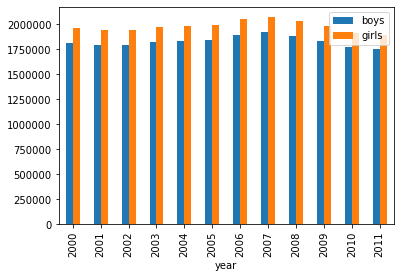

In [49]:
df_pandas = df.where('year >= 2000')

import matplotlib.pyplot as plt
df_five = df_pandas.toPandas()
df_five.set_index('year' , inplace=True)
df_five.plot(kind='bar')
plt.ticklabel_format(axis='y',style='plain')
plt.show()